In [1]:
#!pip install pandas numpy matplotlib seaborn scikit-learn mediapipe


In [2]:
#pip install --upgrade scikit-learn scipy numpy
#pip install --upgrade numpy


In [3]:
#pip install --upgrade numpy pandas matplotlib scipy scikit-learn


# Importing Required Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reading the CSV File

In [5]:
df = pd.read_csv('hand_landmarks_data.csv')

# Displaying the First Few Rows of the Dataset

In [6]:
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


# Checking for Missing Values

In [7]:
print(df.isnull().sum())

x1       0
y1       0
z1       0
x2       0
y2       0
        ..
z20      0
x21      0
y21      0
z21      0
label    0
Length: 64, dtype: int64


# Defining a Function to Visualize Hand Landmarks

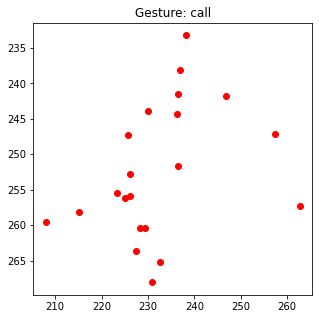

In [8]:
def plot_hand(landmarks, label):
    x = landmarks[0::3]  # Extract x-coordinates
    y = landmarks[1::3]  # Extract y-coordinates

    plt.figure(figsize=(5,5))
    plt.scatter(x, y, marker='o', color='red')
    plt.title(f'Gesture: {label}')
    plt.gca().invert_yaxis()  # Flip y-axis for correct visualization
    plt.show()

# Pick a sample row
sample = df.iloc[0, :-1].values  # Exclude label column
label = df.iloc[0, -1]  # Gesture label
plot_hand(sample, label)


# Defining the Function normalize landmark

In [9]:
def normalize_landmarks(row):
    wrist_x, wrist_y = row[0], row[1]  # Wrist coordinates
    mid_finger_tip_x, mid_finger_tip_y = row[36], row[37]  # Mid finger tip

    # Normalize landmarks (subtract wrist position)
    normalized = np.array(row[:-1])  # Exclude label
    normalized[0::3] -= wrist_x
    normalized[1::3] -= wrist_y

    # Scale by mid-finger tip distance
    scale_factor = np.sqrt((mid_finger_tip_x - wrist_x)**2 + (mid_finger_tip_y - wrist_y)**2)
    normalized /= scale_factor

    return np.append(normalized, row[-1])  # Append label back

# Apply normalization
df_normalized = df.apply(normalize_landmarks, axis=1, result_type='expand')
df_normalized.columns = df.columns  # Keep column names


# Data Splitting
# The data is split into training and testing sets (80% training, 20% testing).

In [10]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df_normalized.iloc[:, :-1]  # Landmark features
y = df_normalized.iloc[:, -1]   # Gesture labels

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate on test set
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')




Random Forest Accuracy: 0.9755


# Support Vector Machine (SVM) model

In [12]:
from sklearn.svm import SVC

# Train SVM
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Evaluate
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {svm_accuracy:.4f}')


SVM Accuracy: 0.9223


# K-Nearest Neighbors model (KNN)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {knn_accuracy:.4f}')


KNN Accuracy: 0.9714


# Saves the Best Model:

In [14]:
import joblib

# Example: If Random Forest was the best model
joblib.dump(rf, 'best_model.pkl')  # Save the model
print("Model saved successfully as 'best_model.pkl'")

Model saved successfully as 'best_model.pkl'


# Generates Classification Reports

In [15]:
from sklearn.metrics import classification_report

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

print("SVM Report:")
print(classification_report(y_test, y_pred_svm))

print("KNN Report:")
print(classification_report(y_test, y_pred_knn))


Random Forest Report:
                 precision    recall  f1-score   support

           call       0.99      1.00      0.99       287
        dislike       1.00      0.99      0.99       260
           fist       0.99      0.99      0.99       209
           four       0.96      0.96      0.96       325
           like       1.00      0.99      1.00       304
           mute       0.94      0.96      0.95       195
             ok       0.98      0.99      0.99       340
            one       0.96      0.96      0.96       248
           palm       0.98      0.97      0.98       317
          peace       0.97      0.97      0.97       276
 peace_inverted       0.96      0.97      0.97       307
           rock       0.99      0.98      0.99       290
           stop       0.93      0.98      0.95       293
  stop_inverted       0.98      0.96      0.97       309
          three       0.98      0.95      0.96       298
         three2       0.99      1.00      0.99       331
        

# Hand Gesture Classification 

In [16]:
import cv2
import mediapipe as mp
import numpy as np
import joblib
import math

# Load the trained model
model = joblib.load('best_model.pkl')

# Initialize MediaPipe
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# Function to normalize landmarks (same as in training)
def normalize_landmarks(landmarks):
    wrist_x, wrist_y = landmarks[0], landmarks[1]  # Wrist coordinates
    mid_finger_tip_x, mid_finger_tip_y = landmarks[36], landmarks[37]  # Mid finger tip
    
    # Normalize landmarks (subtract wrist position)
    normalized = np.array(landmarks)
    normalized[0::3] -= wrist_x
    normalized[1::3] -= wrist_y

    # Scale by mid-finger tip distance
    scale_factor = np.sqrt((mid_finger_tip_x - wrist_x)**2 + (mid_finger_tip_y - wrist_y)**2)
    if scale_factor > 0:
        normalized /= scale_factor
    
    return normalized

# Open webcam
cap = cv2.VideoCapture(0)

# Initialize MediaPipe Hands
hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.5)

while True:
    ret, image = cap.read()
    if not ret:
        break
    
    # Flip and convert color for MediaPipe
    image_rgb = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
    
    # Detect hands
    results = hands.process(image_rgb)
    
    # Convert back to BGR for OpenCV
    image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
    
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Draw hand landmarks
            mp_drawing.draw_landmarks(image_bgr, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            
            # Extract landmark positions
            landmarks = []
            for i in range(21):  # 21 hand landmarks
                landmarks.append(hand_landmarks.landmark[i].x)
                landmarks.append(hand_landmarks.landmark[i].y)
                landmarks.append(hand_landmarks.landmark[i].z)
            
            # Normalize landmarks
            normalized_landmarks = normalize_landmarks(landmarks)
            
            # Predict gesture using the model
            prediction = model.predict([normalized_landmarks])[0]
            
            # Display predicted gesture
            cv2.putText(image_bgr, f"Gesture: {prediction}", (10, 30), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Show the video feed
    cv2.imshow('Hand Gesture Recognition', image_bgr)
    
    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X